## Data from EQ-evolution

In [59]:
%matplotlib inline

from math import *
import matplotlib
import numpy as np
import matplotlib.transforms as transforms
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt
import pylab
from scipy import interpolate
import os
text_size=26
fig_size_x=24
fig_size_y=14

z=[100,50 ];
gev_pi = [];
gev_V_pi =[];
class_tk = [];
for i in range(np.shape(z)[0]):
    gev_pi.append(np.loadtxt("./../output/lcdm_pk00"+str(i)+"_pi.dat"))
    gev_V_pi.append(np.loadtxt("./../output/lcdm_pk00"+str(i)+"_V_pi.dat"))
for i in range(3):
    class_tk.append(np.loadtxt("./../../EQ_hi_class/output/quin_z"+str(i+1)+"_tk.dat"))
gev_bg= np.loadtxt("./../output/quintessence_background.dat")

bg= np.loadtxt("./../../EQ_hi_class/output/quin_background.dat")
Hconf_hiclass = interpolate.interp1d(1./(1.+bg[:,0]) ,bg[:,3])


## Computing v_x_smg and v_x_smg_prime

In [40]:
# class_tk_z2 =np.loadtxt("./../output/quin_perturbations_k0_s.dat")
# # interp_phi = interpolate.interp1d(class_tk_z2[:,1],class_tk_z2[:,17])
# x = class_tk_z2[:,0]; y = class_tk_z2[:,17];
# tck = interpolate.splrep(x, y, s=0)
# ynew = interpolate.splev(x, tck, der=0)
# y_der = interpolate.splev(x, tck, der=1)

In [41]:

###### Normalization factor
As=2.215*1.e-9;
h=0.67556;
kp=0.05/h; 
ns=0.9619;
cs2=1.e-4;
c=2.99792458*1.e5; #Km/s
H0=100*h/c; #H0 in 1/Mpc unit. 0.00022593979933110373
w=-0.9;
k_q = class_tk[0][:,0];

zini = 100.
aini = 1./(1+zini);
Normlization = As*(k_q/kp)**(ns-1.);


#########
## scalar_field
#########
Hconf0_gev = 0.667127
Hconf = interpolate.interp1d((1./gev_bg[:,2]) -1.,gev_bg[:,3]*H0)
scalar = interpolate.interp1d((1./gev_bg[:,2]) -1.,gev_bg[:,4])
scalar_p = interpolate.interp1d((1./gev_bg[:,2]) -1.,gev_bg[:,5])
scalar_pp = interpolate.interp1d((1./gev_bg[:,2]) -1.,gev_bg[:,6])
Vx = class_tk[0][:,5]
# alpha = (cosmo.get_transfer(zini)['h_prime'] + 6.0 * cosmo.get_transfer(zini)['eta_prime'])/(2.*k_q*k_q);

alpha = (class_tk[0][:,11] + 6.0 *class_tk[0][:,13] )/(2.*k_q*k_q);

Vx = Vx + alpha; # gauge transfomration
scalar_field = Vx * scalar_p(zini)/(1./(1+zini))/Hconf0_gev
# # scalar_field = Vx * Hconf(0.) * scalar_p(zini)/aini;
# scalar_field = Vx * H0 * scalar_p(zini)/aini;

#########
## scalar_field_prime
#########
alpha_prime = (class_tk[0][:,9] + class_tk[0][:,8] -  class_tk[0][:,12]);
Vx_prime = class_tk[0][:,6] + alpha_prime; # gauge transfomration
# scalar_field_prime = (Vx_prime * scalar_p(zini) + Vx * (- Hconf0_gev * scalar_p(zini) + scalar_pp(zini)))/aini;
scalar_field_prime = (Vx_prime)# * scalar_p(zini) + Vx * (- Hconf0_gev * scalar_p(zini) + scalar_pp(zini)))/aini;
# scalar_field_prime= 1.0#scalar_field_prime
scalar_field_prime = (Vx_prime * scalar_p(zini) + Vx * (- Hconf(zini) * scalar_p(zini) + scalar_pp(zini)))/aini;
# scalar_field_prime = scalar_field_prime/H0/Hconf0_gev


# Background

## Hubble function

(1.0, 1000.0)

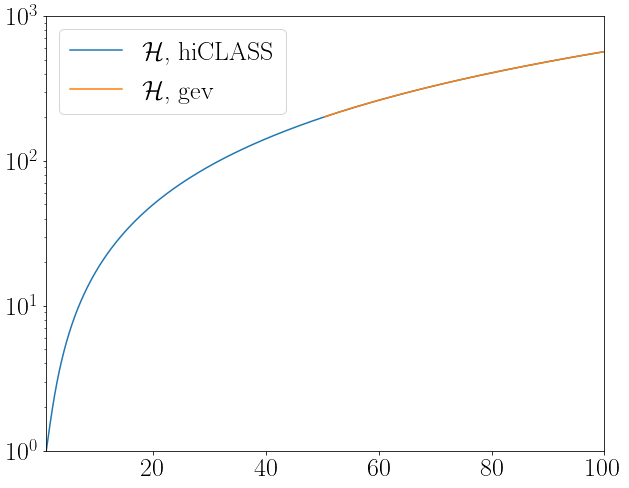

In [42]:

plt.rc('text', usetex=True)
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : text_size}

matplotlib.rc('font', **font)
plt.figure(figsize=(10,8))



###### hiclass results:
#     

plt.plot(1+bg[:,0], bg[:,3]/bg[-1:,3] , label = "$\mathcal{H}$, hiCLASS")

plt.plot(1+(1./gev_bg[:,2]-1), gev_bg[:,3]/gev_bg[:,2], label = "$\mathcal{H}$, gev")

    
plt.legend()
# plt.ylabel(r"$$")
# plt.xscale('log')
plt.yscale('log')
plt.xlim(1,100)
plt.ylim(1.,1.e3)


## scalar field and scalar field' and double prime background

(1e-07, 100.0)

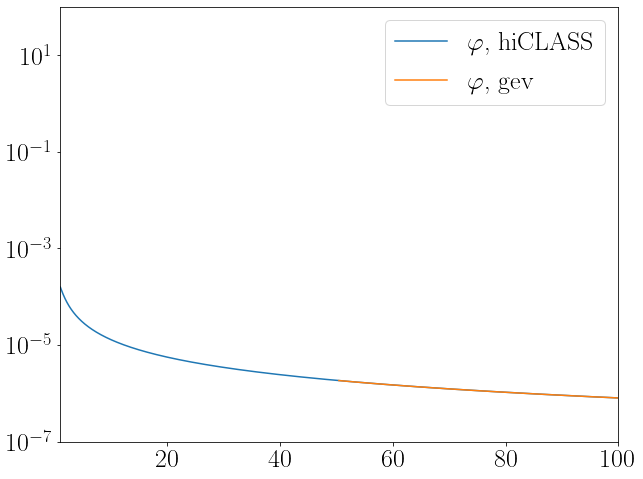

In [43]:

plt.rc('text', usetex=True)
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : text_size}

matplotlib.rc('font', **font)
plt.figure(figsize=(10,8))
a_hiclass = 1./(1.+bg[:,0])
Hconf_hiclass = interpolate.interp1d(bg[:,0] ,bg[:,3] * a_hiclass  )


###### hiclass results:
#     
plt.plot(1+bg[:,0], bg[:,28] *  Hconf_hiclass(0), label = "$\\varphi$, hiCLASS")
plt.plot(1+(1./gev_bg[:,2]-1), gev_bg[:,4], label = "$\\varphi$, gev")

    
plt.legend()
# plt.ylabel(r"$$")

# plt.xscale('log')
plt.yscale('log')
plt.xlim(1,100)
plt.ylim(1.e-7,1.e2)


(1e-07, 1000.0)

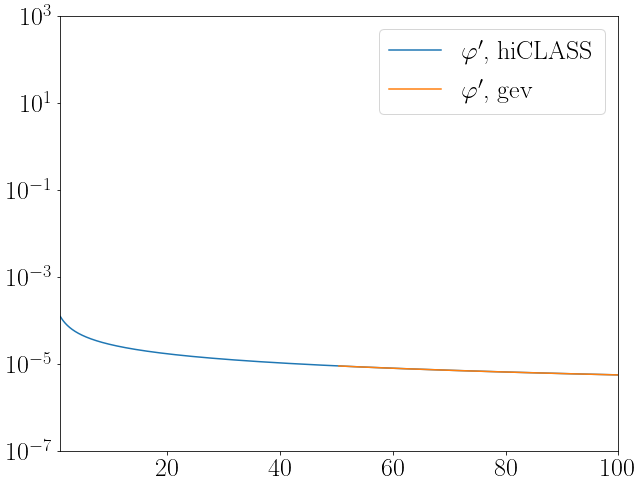

In [44]:

plt.rc('text', usetex=True)
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : text_size}

matplotlib.rc('font', **font)
plt.figure(figsize=(10,8))


scalar_p_hiclass = interpolate.interp1d((bg[:,0]), bg[:,29])

###### hiclass results:
#     
plt.plot(1+bg[:,0], bg[:,29] , label = "$\\varphi'$, hiCLASS")
plt.plot(1+(1./gev_bg[:,2]-1), gev_bg[:,5], label = "$\\varphi'$, gev")

    
plt.legend()
# plt.ylabel(r"$$")
# plt.xscale('log')
plt.yscale('log')
plt.xlim(1,100)
plt.ylim(1.e-7,1.e3)


(1, 100)

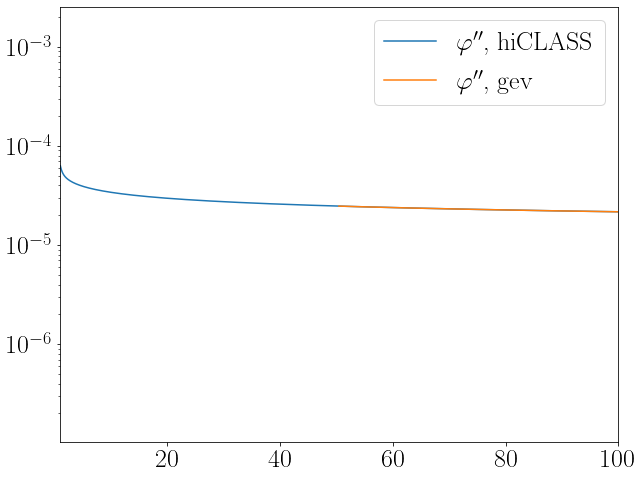

In [45]:

plt.rc('text', usetex=True)
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : text_size}

matplotlib.rc('font', **font)
plt.figure(figsize=(10,8))

###### hiclass results:
#     
plt.plot(1+bg[:,0], bg[:,30]/Hconf_hiclass(0), label = "$\\varphi''$, hiCLASS")
plt.plot(1+(1./gev_bg[:,2]-1), gev_bg[:,6], label = "$\\varphi''$, gev")

    
plt.legend()
# plt.ylabel(r"$$")
# plt.xscale('log')
plt.yscale('log')
plt.xlim(1,100)
# plt.ylim(1.e-1,1.e2)


# Power spectra

## Scalar field power spectrum

(0.001, 1.0)

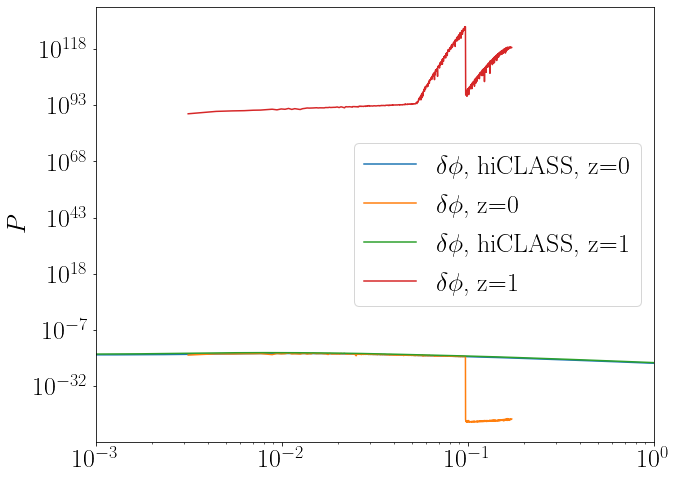

In [61]:
plt.rc('text', usetex=True)
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : text_size}

matplotlib.rc('font', **font)
plt.figure(figsize=(10,8))

#########
## scalar_field
#########

Hconf = interpolate.interp1d((1./gev_bg[:,2]) -1.,gev_bg[:,3]*H0)
scalar = interpolate.interp1d((1./gev_bg[:,2]) -1.,gev_bg[:,4])
scalar_p = interpolate.interp1d((1./gev_bg[:,2]) -1.,gev_bg[:,5])
scalar_pp = interpolate.interp1d((1./gev_bg[:,2]) -1.,gev_bg[:,6])


a_hiclass = 1./(1.+bg[:,0])
Hconf_hiclass = interpolate.interp1d(bg[:,0] ,bg[:,3] * a_hiclass  )




###### hiclass results:
for i in range(2):
    alpha = (class_tk[i][:,11] + 6.0 *class_tk[i][:,13] )/(2.*k_q*k_q);
    Vx = class_tk[i][:,5]
    Vx = Vx + alpha; # gauge transfomration
    scalar_field = Vx * Hconf_hiclass(0) * scalar_p(zini)/(1./(1+zini)) 
    plt.plot(class_tk[i][:,0], (scalar_field)**2* Normlization , label = "$\delta \phi$, hiCLASS, z="+str(i))

#     plt.plot(k_q,pi_p**2 * Normlization/k_q**3/(2*np.pi),label = "$VX'$, z="+str(i))
    
#     plt.plot(gev_pi[0][:,0],gev_pi[0][:,1],label = "$VX$, z="+str(i))
    plt.plot(gev_V_pi[i][:,0],gev_pi[i][:,1],label = "$\delta \phi$, z="+str(i))
    
plt.legend()
plt.ylabel(r"$P$")
plt.xscale('log')
plt.yscale('log')
plt.xlim(1.e-3,1.e0)
# plt.ylim(1.e-21,1.e-14)


## phi' power

(0.001, 1.0)

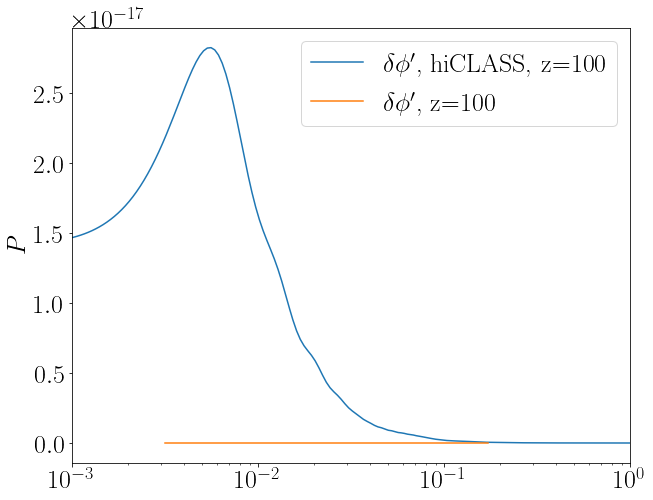

In [58]:
###### Normalization factor
As=2.215*1.e-9;
h=0.67556;
kp=0.05/h; 
ns=0.9619;
cs2=1.e-4;
c=2.99792458*1.e5; #Km/s
H0=100*h/c; #H0 in 1/Mpc unit. 0.00022593979933110373
w=-0.9;
k_q = class_tk[0][:,0];

zini = 100.
aini = 1./(1+zini);
Normlization = As*(k_q/kp)**(ns-1.);

a_hiclass = 1./(1.+bg[:,0])
Hconf_hiclass = interpolate.interp1d(bg[:,0] ,bg[:,3] * a_hiclass  )
scalar = interpolate.interp1d((1./gev_bg[:,2]) -1.,gev_bg[:,4])
scalar_p = interpolate.interp1d((1./gev_bg[:,2]) -1.,gev_bg[:,5])
scalar_pp = interpolate.interp1d((1./gev_bg[:,2]) -1.,gev_bg[:,6])

#########
## scalar_field_prime
#########
zini = 100
alpha_prime = (class_tk[0][:,9] + class_tk[0][:,8] -  class_tk[0][:,12]);
Vx_prime = class_tk[0][:,6] + alpha_prime; # gauge transfomration
scalar_field_prime = (Vx_prime * scalar_p(zini) + Vx * (- Hconf_hiclass(zini) * scalar_p(zini) + scalar_pp(zini) * Hconf_hiclass(0)))/aini;



plt.rc('text', usetex=True)
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : text_size}

matplotlib.rc('font', **font)
plt.figure(figsize=(10,8))



###### hiclass results:
for i in [zini]:
#     
    plt.plot(class_tk[0][:,0], (scalar_field_prime)**2* Normlization, label = "$\delta\phi'$, hiCLASS, z="+str(i))

#     plt.plot(k_q,pi_p**2 * Normlization/k_q**3/(2*np.pi),label = "$VX'$, z="+str(i))
    
#     plt.plot(gev_pi[0][:,0],gev_pi[0][:,1],label = "$VX$, z="+str(i))
    plt.plot(gev_V_pi[0][:,0],gev_V_pi[0][:,1],label = r"$\delta\phi'$, z="+str(i))
    
plt.legend()
plt.ylabel(r"$P$")
plt.xscale('log')
# plt.yscale('log')
plt.xlim(1.e-3,1.e0)
# plt.ylim(1.e-19,1.e-11)


In [18]:
# plt.rc('text', usetex=True)
# font = {'family' : 'normal',
#         'weight' : 'bold',
#         'size'   : text_size}

# matplotlib.rc('font', **font)
# plt.figure(figsize=(10,8))



# ###### hiclass results:
# for i in [100]:
    
#     plt.plot(class_tk[0][:,0], (class_tk[0][:,5])**2 * Normlization , label = "$VX$, CLASS, z="+str(i))

# #     plt.plot(k_q,pi_p**2 * Normlization/k_q**3/(2*np.pi),label = "$VX'$, z="+str(i))
    
# #     plt.plot(gev_pi[0][:,0],gev_pi[0][:,1],label = "$VX$, z="+str(i))
# #     plt.plot(gev_V_pi[0][:,0],gev_pi[0][:,1],label = "$VX'$, z="+str(i))
    
# plt.legend()
# plt.ylabel(r"$P$")
# plt.xscale('log')
# plt.yscale('log')
# plt.xlim(6.e-3,1.e-1)
# # plt.ylim(1.e-10,1.e-3)

(1e-14, 1e-06)

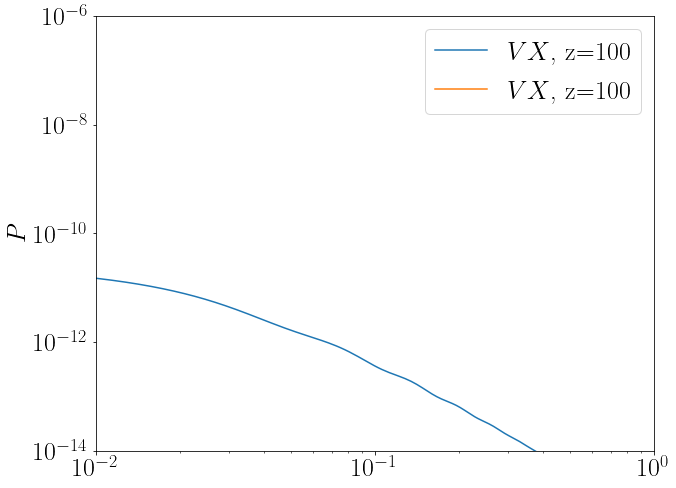

In [9]:
# plt.rc('text', usetex=True)
# font = {'family' : 'normal',
#         'weight' : 'bold',
#         'size'   : text_size}

# matplotlib.rc('font', **font)
# plt.figure(figsize=(10,8))

# ###### Normalization factor
# As=2.215*1.e-9;
# h=0.67556;
# kp=0.05/h; 
# ns=0.9619;
# cs2=1.e-4;
# c=2.99792458*1.e5; #Km/s
# H0=100*h/c; #H0 in 1/Mpc unit. 0.00022593979933110373
# w=-0.9;
# def Hubble_conf_Mpc(a):
#     c=2.99792458*1.e5;h=0.67556;H0=100*h/c;w=-0.9;
#     Omega_b=0.022032/h/h; Omega_cdm=0.12038/h/h;
#     Omega_m=Omega_b+Omega_cdm; Omega_Lambda=0;
#     Omega_rad=9.1671353942930788e-05; Omega_kessence=1.-Omega_m-Omega_rad;
#     return H0*np.sqrt(Omega_m*(a**-3)+Omega_rad*(a**-4)+Omega_kessence*(a**(-3*(1+w))))*a
# Normlization=As*(k_q/kp)**(ns-1.);

# ###### hiclass results:
# for i in [100]:
# #     k_q *=h
#     plt.plot(k_q,scalar_field**2*Normlization, label = "$VX$, z="+str(i))

# #     plt.plot(k_q,pi_p**2 * Normlization/k_q**3/(2*np.pi),label = "$VX'$, z="+str(i))
    
#     plt.plot(gev_pi[0][:,0],gev_pi[0][:,1],label = "$VX$, z="+str(i))
# #     plt.plot(gev_V_pi[0][:,0],gev_V_pi[0][:,1],label = "$VX'$, z="+str(i))
    
# plt.legend()
# plt.ylabel(r"$P$")
# plt.xscale('log')
# plt.yscale('log')
# plt.xlim(1.e-2,1)
# plt.ylim(1.e-14,1.e-6)

# Test

In [85]:
z_gev=[100];
gev_pi = [];
gev_V_pi =[];
for i in range(np.shape(z_gev)[0]):
    gev_pi.append(np.loadtxt("./../../EQevolution/output/lcdm_pk00"+str(i)+"_pi.dat"))
    gev_V_pi.append(np.loadtxt("./../../EQevolution/output/lcdm_pk00"+str(i)+"_V_pi.dat"))
gev_bg= np.loadtxt("./../../EQevolution/output/quintessence_background.dat")

In [86]:
###### Normalization factor
As=2.215*1.e-9;
h=0.67556;
kp=0.05/h; 
ns=0.9619;
cs2=1.e-4;
c=2.99792458*1.e5; #Km/s
H0=100*h/c; #H0 in 1/Mpc unit. 0.00022593979933110373
w=-0.9;
k_q = cosmo.get_transfer(i)['k (h/Mpc)'];
Normlization=As*(k_q/kp)**(ns-1.);

zini = 100.
aini = 1./(1+zini);

#########
## scalar_field
#########
Hconf = interpolate.interp1d((1./gev_bg[:,2]) -1.,gev_bg[:,3]*H0)
scalar = interpolate.interp1d((1./gev_bg[:,2]) -1.,gev_bg[:,4])
scalar_p = interpolate.interp1d((1./gev_bg[:,2]) -1.,gev_bg[:,5])
scalar_pp = interpolate.interp1d((1./gev_bg[:,2]) -1.,gev_bg[:,6])
Vx = cosmo.get_transfer(i)['vx_smg']
alpha = (cosmo.get_transfer(i)['h_prime'] + 6.0 * cosmo.get_transfer(i)['eta_prime'])/(2.*k_q*k_q);
Vx = Vx + 0. * alpha; # gauge transfomration
# scalar_field = Vx * Hconf(0.) * scalar_p(zini)/aini;
#########
## scalar_field_prime
#########
alpha_prime = (cosmo.get_transfer(i)['psi'] + cosmo.get_transfer(i)['phi'] -  cosmo.get_transfer(i)['eta']);
Vx_prime = cosmo.get_transfer(i)['vx_prime_smg'] + 0. * alpha_prime; # gauge transfomration
# scalar_field_prime = Vx_prime * scalar_p(zini)/aini + scalar_field * (-Hconf(zini) + scalar_pp(zini)/scalar_p(zini));


(0.0002, 0.01)

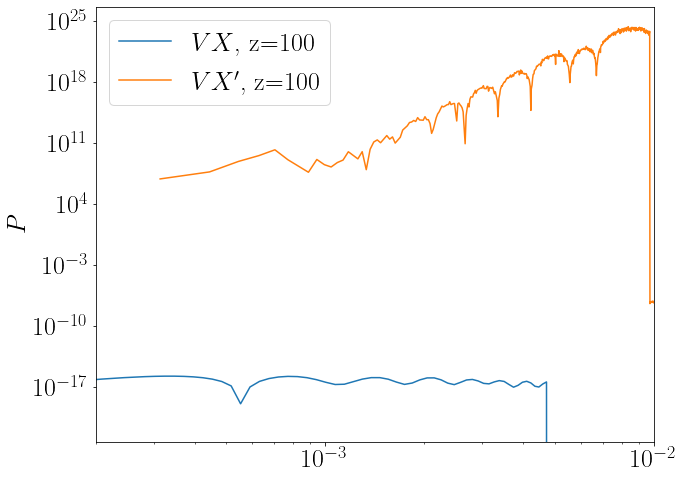

In [92]:
plt.rc('text', usetex=True)
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : text_size}

matplotlib.rc('font', **font)
plt.figure(figsize=(10,8))



###### hiclass results:
for i in [100]:
    
    plt.plot(k_q,Vx_prime**2 , label = "$VX$, z="+str(i))

#     plt.plot(k_q,pi_p**2 * Normlization/k_q**3/(2*np.pi),label = "$VX'$, z="+str(i))
    
#     plt.plot(gev_pi[0][:,0],gev_pi[0][:,1],label = "$VX$, z="+str(i))
    plt.plot(gev_V_pi[0][:,0],gev_V_pi[0][:,1],label = "$VX'$, z="+str(i))
    
plt.legend()
plt.ylabel(r"$P$")
plt.xscale('log')
plt.yscale('log')
plt.xlim(2.e-4,0.01)
# plt.ylim(1.e-24,1.e-12)

# pi comparison

(1e-05, 1)

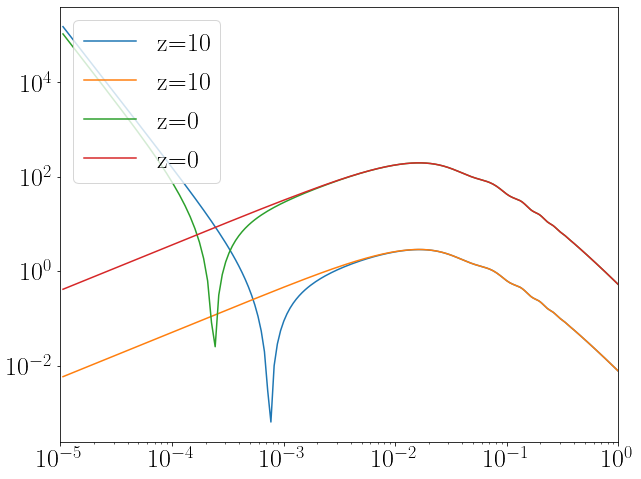

In [19]:
plt.rc('text', usetex=True)
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : text_size}

matplotlib.rc('font', **font)
plt.figure(figsize=(10,8))

###### Normalization factor
As=2.215*1.e-9;
h=0.67556;
kp=0.05/h; 
ns=0.9619;
cs2=1.e-4;
c=2.99792458*1.e5; #Km/s
H0=100*h/c; #H0 in 1/Mpc unit. 0.00022593979933110373
w=-0.9;
def Hubble_conf_Mpc(a):
    c=2.99792458*1.e5;h=0.67556;H0=100*h/c;w=-0.9;
    Omega_b=0.022032/h/h; Omega_cdm=0.12038/h/h;
    Omega_m=Omega_b+Omega_cdm; Omega_Lambda=0;
    Omega_rad=9.1671353942930788e-05; Omega_kessence=1.-Omega_m-Omega_rad;
    return H0*np.sqrt(Omega_m*(a**-3)+Omega_rad*(a**-4)+Omega_kessence*(a**(-3*(1+w))))*a
Normlization=As*(k_q/kp)**(ns-1.);


###### hiclass results:
for i in [10,0]:
    k_q = cosmo.get_transfer(i)['k (h/Mpc)'];
    pi = cosmo.get_transfer(i)['d_V_x_smg'] + cosmo.get_transfer(i)['alpha'];
    plt.plot(k_q,pi**2 * Normlization/k_q**3/(2*np.pi),label = "z="+str(i))
    pi = cosmo.get_transfer(i)['t_V_x_smg'] ;
    plt.plot(k_q,pi**2 * Normlization/k_q**3/(2*np.pi),label = "z="+str(i))

###### EQ-evolution results:
# for i in [3,6]:
#     a =1/(1+z_gev[i]);
#     k = gev_result_pi[i][:,0];
#     plt.plot(k,gev_result_pi[i][:,1]/Hubble_conf_Mpc(a)/Hubble_conf_Mpc(a),"o",label="z="+str(z_gev[i]))

plt.legend()
plt.xscale('log')
plt.yscale('log')
plt.xlim(1.e-5,1)

# V_pi comparison

(0.01, 1)

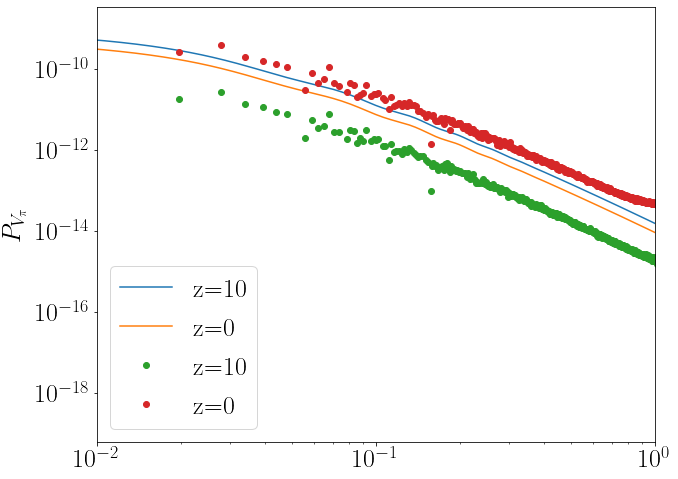

In [12]:
plt.rc('text', usetex=True)
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : text_size}

matplotlib.rc('font', **font)
plt.figure(figsize=(10,8))

###### Normalization factor
As=2.215*1.e-9;
h=0.67556;
kp=0.05/h; 
ns=0.9619;
cs2=1.e-4;
c=2.99792458*1.e5; #Km/s
H0=100*h/c; #H0 in 1/Mpc unit. 0.00022593979933110373
w=-0.9;
def Hubble_conf_Mpc(a):
    c=2.99792458*1.e5;h=0.67556;H0=100*h/c;w=-0.9;
    Omega_b=0.022032/h/h; Omega_cdm=0.12038/h/h;
    Omega_m=Omega_b+Omega_cdm; Omega_Lambda=0;
    Omega_rad=9.1671353942930788e-05; Omega_kessence=1.-Omega_m-Omega_rad;
    return H0*np.sqrt(Omega_m*(a**-3)+Omega_rad*(a**-4)+Omega_kessence*(a**(-3*(1+w))))*a
Normlization=As*(k_q/kp)**(ns-1.);


###### hiclass results:
for i in [10,0]:
    k_q = cosmo.get_transfer(i)['k (h/Mpc)'];
    v_pi = cosmo.get_transfer(i)['vx_prime_smg']
    plt.plot(k_q,v_pi**2 * Normlization,label = "z="+str(i))

###### EQ-evolution results:
for i in [3,6]:
    a =1/(1+z_gev[i]);
    k = gev_result_V_pi[i][:,0];
    plt.plot(k,gev_result_V_pi[i][:,1],"o",label="z="+str(z_gev[i]))

plt.legend()
plt.ylabel(r"$P_{V_{\pi}}$")
plt.xscale('log')
plt.yscale('log')
plt.xlim(1.e-2,1)



(0.01, 1)

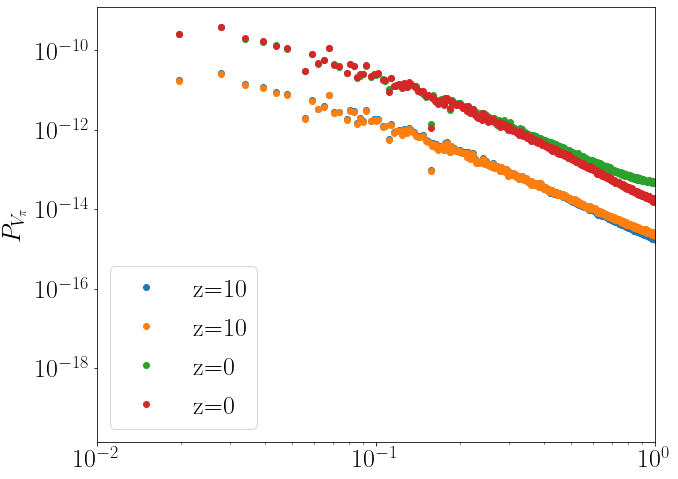

In [13]:
plt.rc('text', usetex=True)
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : text_size}

matplotlib.rc('font', **font)
plt.figure(figsize=(10,8))

###### Normalization factor
As=2.215*1.e-9;
h=0.67556;
kp=0.05/h; 
ns=0.9619;
cs2=1.e-4;
c=2.99792458*1.e5; #Km/s
H0=100*h/c; #H0 in 1/Mpc unit. 0.00022593979933110373
w=-0.9;
def Hubble_conf_Mpc(a):
    c=2.99792458*1.e5;h=0.67556;H0=100*h/c;w=-0.9;
    Omega_b=0.022032/h/h; Omega_cdm=0.12038/h/h;
    Omega_m=Omega_b+Omega_cdm; Omega_Lambda=0;
    Omega_rad=9.1671353942930788e-05; Omega_kessence=1.-Omega_m-Omega_rad;
    return H0*np.sqrt(Omega_m*(a**-3)+Omega_rad*(a**-4)+Omega_kessence*(a**(-3*(1+w))))*a
Normlization=As*(k_q/kp)**(ns-1.);


###### EQ-evolution results:
for i in [3,6]:
    a =1/(1+z_gev[i]);
    k = gev_result_V_pi[i][:,0];
    plt.plot(k,gev_result_V_pi[i][:,1],"o",label="z="+str(z_gev[i]))
    plt.plot(k,gev_result_pi[i][:,1],"o",label="z="+str(z_gev[i]))

plt.legend()
plt.ylabel(r"$P_{V_{\pi}}$")
plt.xscale('log')
plt.yscale('log')
plt.xlim(1.e-2,1)

findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.


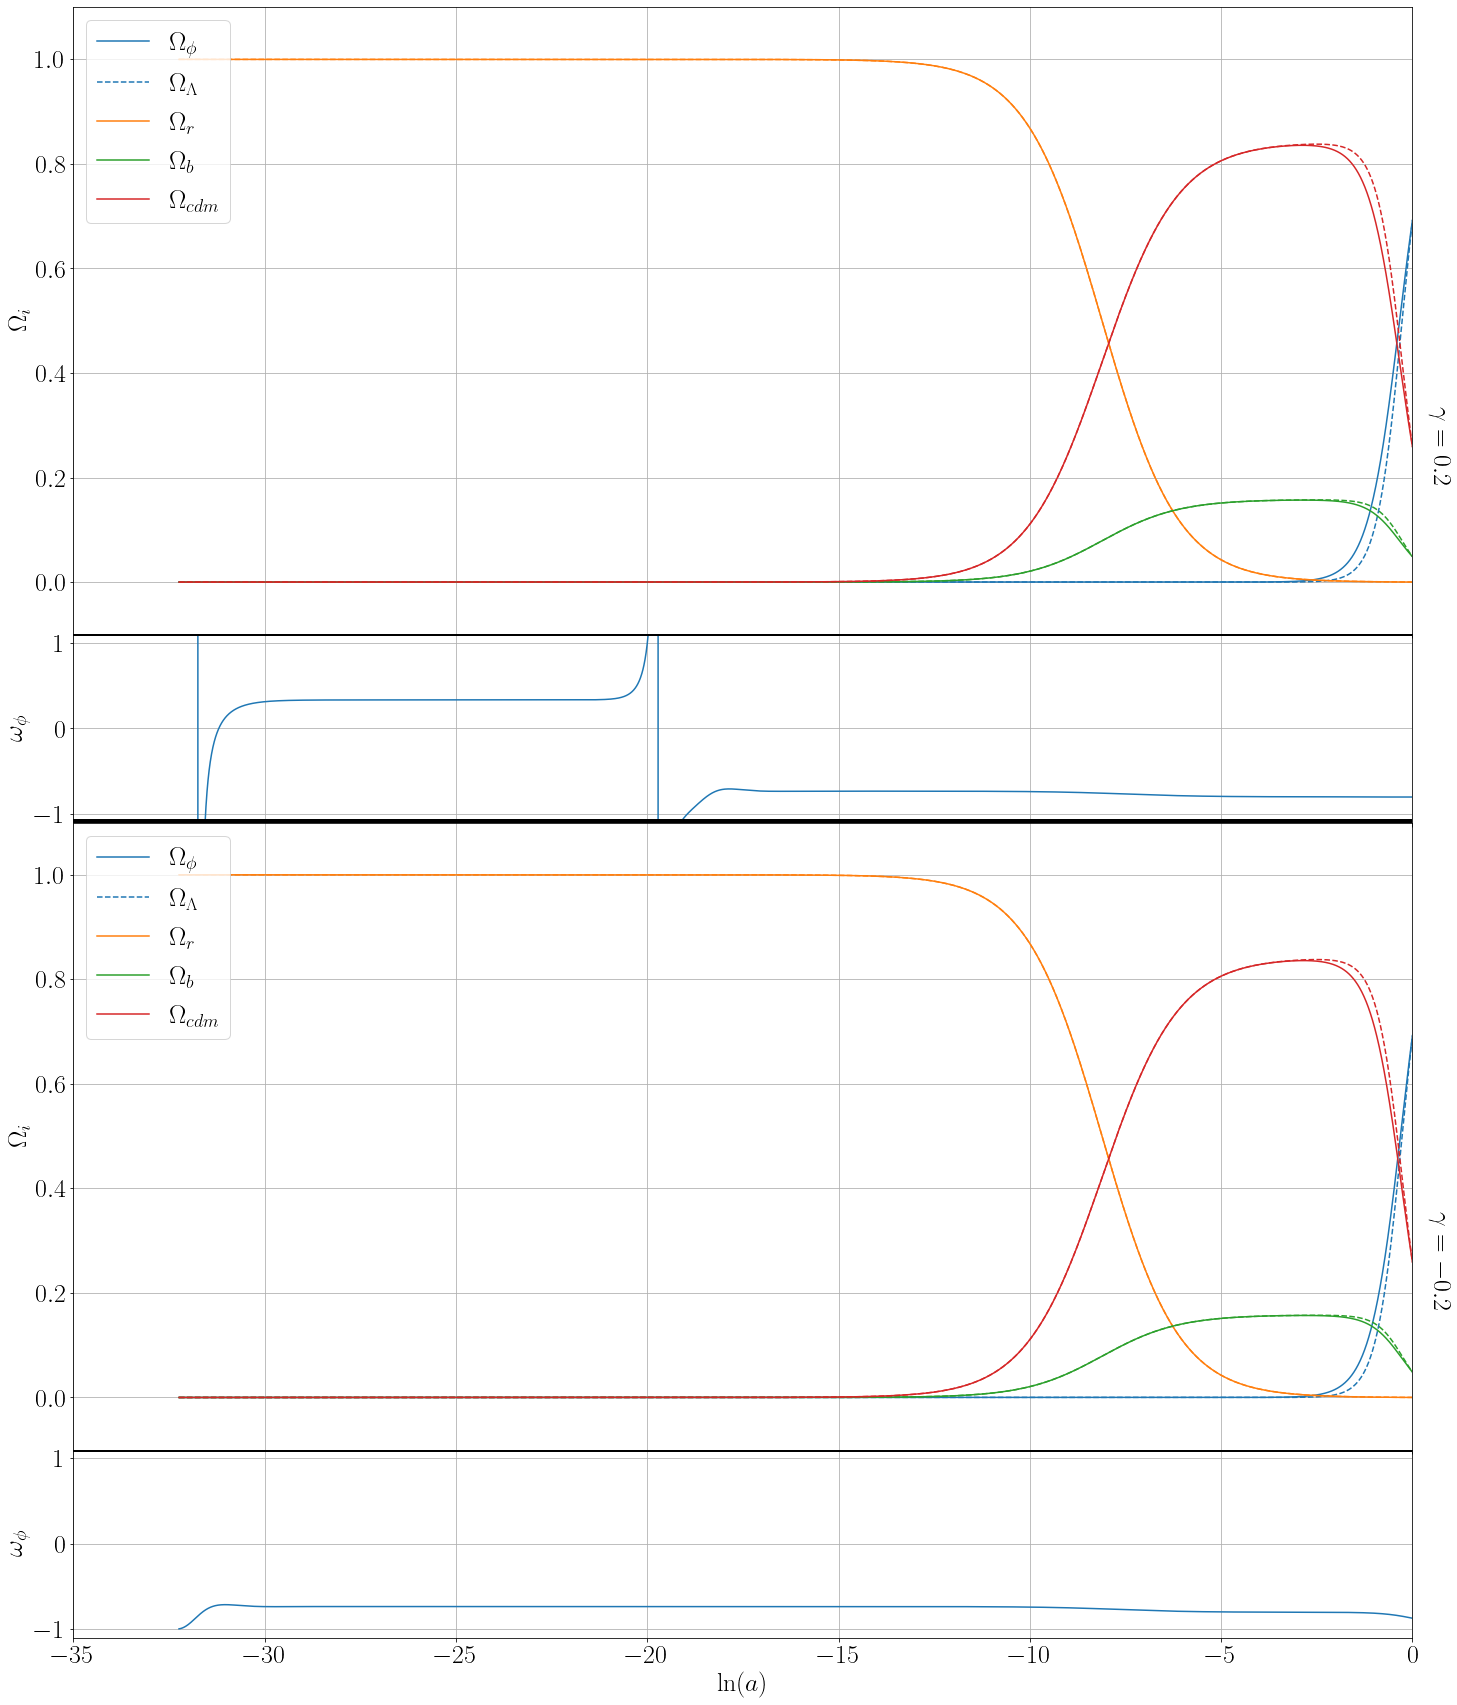

In [2]:
N_last = - 35

plt.rc('text', usetex=True)
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : text_size}

matplotlib.rc('font', **font)

borders=[-15,0,-0.1,1.1]

f, (ax1, ax1_w, ax2, ax2_w) = plt.subplots(4, sharex=True, sharey=False ,figsize=(24,30),gridspec_kw = {'height_ratios':[1,0.3,1,0.3]})
p1=ax1.plot(np.log(1/(1+bkg_fe['z'])),bkg_fe['(.)rho_smg']/bkg_fe['(.)rho_crit'],label='$\Omega_{\phi}$')
color=p1[0].get_color()
ax1.plot(np.log(1/(1+bkg_lcdm['z'])),(bkg_lcdm['(.)rho_lambda'])/bkg_lcdm['(.)rho_crit'],linestyle='--',label='$\Omega_\Lambda$',color=color)
p2=ax1.plot(np.log(1/(1+bkg_fe['z'])),(bkg_fe['(.)rho_g']+bkg_fe['(.)rho_ur'])/bkg_fe['(.)rho_crit'],label='$\Omega_{r}$')
color=p2[0].get_color()
ax1.plot(np.log(1/(1+bkg_lcdm['z'])),(bkg_lcdm['(.)rho_g']+bkg_lcdm['(.)rho_ur'])/bkg_lcdm['(.)rho_crit'],linestyle='dashed',color=color)
p3=ax1.plot(np.log(1/(1+bkg_fe['z'])),(bkg_fe['(.)rho_b'])/bkg_fe['(.)rho_crit'],label='$\Omega_{b}$')
color=p3[0].get_color()
ax1.plot(np.log(1/(1+bkg_lcdm['z'])),(bkg_lcdm['(.)rho_b'])/bkg_lcdm['(.)rho_crit'],linestyle='dashed',color=color)
p4=ax1.plot(np.log(1/(1+bkg_fe['z'])),(bkg_fe['(.)rho_cdm'])/bkg_fe['(.)rho_crit'],label='$\Omega_{cdm}$')
color=p4[0].get_color()
ax1.plot(np.log(1/(1+bkg_lcdm['z'])),(bkg_lcdm['(.)rho_cdm'])/bkg_lcdm['(.)rho_crit'],linestyle='dashed',color=color)

ax1.set_ylabel("$\Omega_i$")
ax1.legend(loc='upper left')
ax1.grid(True)
ax1.axis([N_last,0,-0.1,1.1])
ax1.set_xlim(-15,0)

p1_w=ax1_w.plot(np.log(1/(1+bkg_fe['z'])),bkg_fe['(.)p_smg']/bkg_fe['(.)rho_smg'])
ax1_w.set_ylabel("$\omega_\phi$")
ax1_w.grid(True)
ax1_w.axhline(1.1, color="black", linewidth=4)
ax1_w.axhline(-1.1, color="black", linewidth=8)
ax1_w.axis([N_last,0,-1.1,1.1])

left, width = .25, .5
bottom, height = .25, .5
right = left + width
top = bottom + height
ax1.text(1.02, 0.3*(bottom+top), '$\\gamma=0.2$', horizontalalignment='center', verticalalignment='center', rotation=270, transform=ax1.transAxes)

p1=ax2.plot(np.log(1/(1+bkg_fe2['z'])),bkg_fe2['(.)rho_smg']/bkg_fe2['(.)rho_crit'],label='$\Omega_{\phi}$')
color=p1[0].get_color()
ax2.plot(np.log(1/(1+bkg_lcdm['z'])),(bkg_lcdm['(.)rho_lambda'])/bkg_lcdm['(.)rho_crit'],linestyle='--',label='$\Omega_\Lambda$',color=color)
p2=ax2.plot(np.log(1/(1+bkg_fe2['z'])),(bkg_fe2['(.)rho_g']+bkg_fe2['(.)rho_ur'])/bkg_fe2['(.)rho_crit'],label='$\Omega_{r}$')
color=p2[0].get_color()
ax2.plot(np.log(1/(1+bkg_lcdm['z'])),(bkg_lcdm['(.)rho_g']+bkg_lcdm['(.)rho_ur'])/bkg_lcdm['(.)rho_crit'],linestyle='dashed',color=color)
p3=ax2.plot(np.log(1/(1+bkg_fe2['z'])),(bkg_fe2['(.)rho_b'])/bkg_fe2['(.)rho_crit'],label='$\Omega_{b}$')
color=p3[0].get_color()
ax2.plot(np.log(1/(1+bkg_lcdm['z'])),(bkg_lcdm['(.)rho_b'])/bkg_lcdm['(.)rho_crit'],linestyle='dashed',color=color)
p4=ax2.plot(np.log(1/(1+bkg_fe2['z'])),(bkg_fe2['(.)rho_cdm'])/bkg_fe2['(.)rho_crit'],label='$\Omega_{cdm}$')
color=p4[0].get_color()
ax2.plot(np.log(1/(1+bkg_lcdm['z'])),(bkg_lcdm['(.)rho_cdm'])/bkg_lcdm['(.)rho_crit'],linestyle='dashed',color=color)
#ax2.set_xlabel("log($a$)")
ax2.set_ylabel("$\Omega_i$")
ax2.legend(loc='upper left')
ax2.grid(True)
ax2.axis([N_last,0,-0.1,1.1])

ax2.text(1.02, 0.3*(bottom+top), '$\\gamma=-0.2$', horizontalalignment='center', verticalalignment='center', rotation=270, transform=ax2.transAxes)

p2_w=ax2_w.plot(np.log(1/(1+bkg_fe2['z'])),bkg_fe2['(.)p_smg']/bkg_fe2['(.)rho_smg'])
ax2_w.set_ylabel("$\omega_\phi$")
ax2_w.set_xlabel("ln($a$)")
ax2_w.axhline(1.1, color="black", linewidth=4)
ax2_w.grid(True)
ax2_w.axis([N_last,0,-1.1,1.1])

f.subplots_adjust(hspace=0)
f.figsize=(24,24)
plt.setp([a.get_xticklabels() for a in f.axes[:-1]], visible=False)

#plt.savefig('/Users/Alessandro/Documents/Google Drive/Uni/Laurea Magistrale/Prova finale/Tesi/Img/jupyter/quint_density.eps',bbox_inches='tight',format='eps',dpi=1000)
#plt.savefig('/Users/Alessandro/Documents/Google Drive/Uni/Laurea Magistrale/Prova finale/Tesi/Img/jupyter/quint_density.pdf',bbox_inches='tight')